<a href="https://colab.research.google.com/github/matthog/MLHW/blob/main/MattHogan_801190363_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training with learning rate: 0.1
Epoch 500/5000, Loss: 2.2134673595428467
Epoch 1000/5000, Loss: 2.1455564498901367
Epoch 1500/5000, Loss: 2.114387035369873
Epoch 2000/5000, Loss: 2.1000797748565674
Epoch 2500/5000, Loss: 2.0935139656066895
Epoch 3000/5000, Loss: 2.0905003547668457
Epoch 3500/5000, Loss: 2.0891172885894775
Epoch 4000/5000, Loss: 2.088482618331909
Epoch 4500/5000, Loss: 2.0881905555725098
Epoch 5000/5000, Loss: 2.088057041168213

Training with learning rate: 0.01
Epoch 500/5000, Loss: 8.012911796569824
Epoch 1000/5000, Loss: 3.0363805294036865
Epoch 1500/5000, Loss: 2.3942160606384277
Epoch 2000/5000, Loss: 2.2993147373199463
Epoch 2500/5000, Loss: 2.2744176387786865
Epoch 3000/5000, Loss: 2.259310007095337
Epoch 3500/5000, Loss: 2.2463316917419434
Epoch 4000/5000, Loss: 2.2344508171081543
Epoch 4500/5000, Loss: 2.2234768867492676
Epoch 5000/5000, Loss: 2.213327169418335

Training with learning rate: 0.001
Epoch 500/5000, Loss: 47.365543365478516
Epoch 1000/5000, Loss:

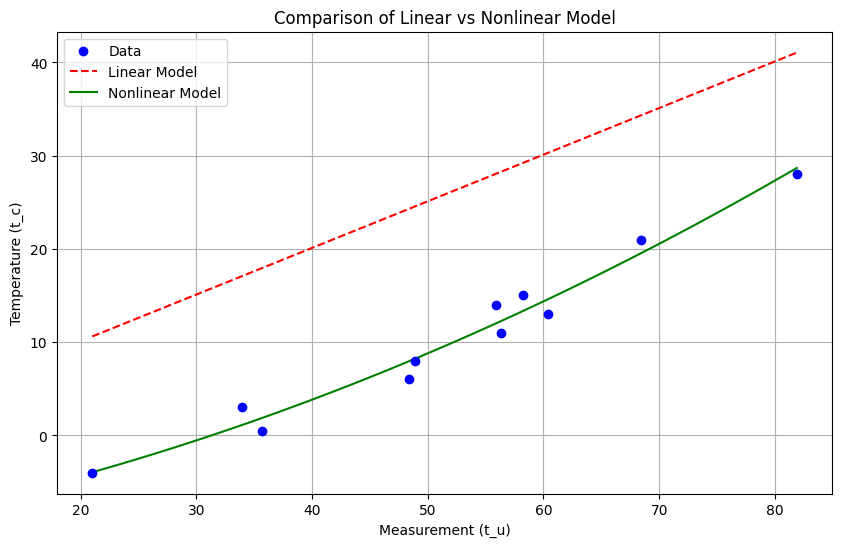

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Data from the example
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.0, 48.4, 60.4, 68.4])

# Normalize the input data
t_u_min, t_u_max = t_u.min(), t_u.max()
t_u_normalized = (t_u - t_u_min) / (t_u_max - t_u_min)

# Nonlinear model definition
def nonlinear_model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss function (MSE)
def loss_fn(predicted, target):
    return torch.mean((predicted - target) ** 2)

# Training function
def train_nonlinear_model(t_u, t_c, lr, epochs=5000, log_interval=500):
    # Initialize parameters with small values
    w2 = torch.tensor([0.01], requires_grad=True)
    w1 = torch.tensor([0.01], requires_grad=True)
    b = torch.tensor([0.0], requires_grad=True)

    # Optimizer
    optimizer = optim.SGD([w2, w1, b], lr=lr)

    # Store losses
    losses = []

    for epoch in range(1, epochs + 1):
        # Forward pass
        predictions = nonlinear_model(t_u, w2, w1, b)
        loss = loss_fn(predictions, t_c)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Log loss at intervals
        if epoch % log_interval == 0:
            losses.append(loss.item())
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

    return w2, w1, b, losses

# Experiment with learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
normalized_results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    w2, w1, b, losses = train_nonlinear_model(t_u_normalized, t_c, lr=lr)
    normalized_results[lr] = {"w2": w2, "w1": w1, "b": b, "losses": losses}

# Parameters from the best nonlinear model (lr = 0.1)
w2_best, w1_best, b_best = (
    normalized_results[0.1]["w2"],
    normalized_results[0.1]["w1"],
    normalized_results[0.1]["b"],
)

# Linear model for comparison
def linear_model(t_u, w, b):
    return w * t_u + b

# Simulated linear model parameters (example from lecture)
w_linear = torch.tensor(0.5)  # Example weight for linear model
b_linear = torch.tensor(0.1)  # Example bias for linear model

# Predictions using both models
t_u_normalized_range = torch.linspace(0, 1, 100)  # Range for normalized input
t_u_original_range = t_u_normalized_range * (t_u_max - t_u_min) + t_u_min

# Nonlinear model predictions
pred_nonlinear = nonlinear_model(t_u_normalized_range, w2_best, w1_best, b_best)

# Linear model predictions
pred_linear = linear_model(t_u_original_range, w_linear, b_linear)

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.scatter(t_u, t_c, label="Data", color="blue", zorder=5)
plt.plot(
    t_u_original_range, pred_linear.detach(), label="Linear Model", color="red", linestyle="--"
)
plt.plot(
    t_u_original_range, pred_nonlinear.detach(), label="Nonlinear Model", color="green"
)
plt.xlabel("Measurement (t_u)")
plt.ylabel("Temperature (t_c)")
plt.title("Comparison of Linear vs Nonlinear Model")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests

# Load the dataset directly from the URL
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
response = requests.get(url)
if response.status_code == 200:
    with open("Housing.csv", "wb") as file:
        file.write(response.content)
else:
    raise Exception(f"Failed to download the dataset. HTTP Status Code: {response.status_code}")

data = pd.read_csv("Housing.csv")

# Preprocess the data
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = data[features].values
y = data[target].values.reshape(-1, 1)

# Standardize features and target
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.random.randn(n_features, 1) * 0.01
bias = np.zeros(1)

# Define hyperparameters
learning_rates = [0.01, 0.001, 0.0001]
epochs = 2000
log_interval = 100  # Log loss every 100 epochs

# Function to compute loss (Mean Squared Error)
def compute_loss(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias
    error = predictions - y
    mse = np.mean(error ** 2)
    return mse

# Training loop
results = {}

for lr in learning_rates:
    # Reinitialize weights and bias for each learning rate
    weights = np.random.randn(n_features, 1) * 0.01
    bias = np.zeros(1)
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        # Predictions
        predictions = np.dot(X_train, weights) + bias
        error = predictions - y_train

        # Gradients
        dW = (2 / X_train.shape[0]) * np.dot(X_train.T, error)
        dB = (2 / X_train.shape[0]) * np.sum(error)

        # Update weights and bias
        weights -= lr * dW
        bias -= lr * dB

        # Compute and log loss
        if epoch % log_interval == 0:
            train_loss = compute_loss(X_train, y_train, weights, bias)
            val_loss = compute_loss(X_val, y_val, weights, bias)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            print(f"LR: {lr}, Epoch: {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Store the results
    results[lr] = (train_losses, val_losses, weights, bias)

# Find the best model (lowest validation loss)
best_lr = min(results, key=lambda k: min(results[k][1]))
best_val_loss = min(results[best_lr][1])
print(f"\nBest Learning Rate: {best_lr} with Lowest Validation Loss: {best_val_loss:.4f}")

# Save the best model
best_weights, best_bias = results[best_lr][2], results[best_lr][3]



LR: 0.01, Epoch: 100, Train Loss: 0.3906, Val Loss: 0.6676
LR: 0.01, Epoch: 200, Train Loss: 0.3869, Val Loss: 0.6569
LR: 0.01, Epoch: 300, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 400, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 500, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 600, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 700, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 800, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 900, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1000, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1100, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1200, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1300, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1400, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1500, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1600, Train Loss: 0.3866, Val Loss: 0.6565
LR: 0.01, Epoch: 1700, Train Loss: 0.3866, Val Lo

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import requests

# Load the dataset directly from the URL
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
response = requests.get(url)
if response.status_code == 200:
    with open("Housing.csv", "wb") as file:
        file.write(response.content)
else:
    raise Exception(f"Failed to download the dataset. HTTP Status Code: {response.status_code}")

data = pd.read_csv("Housing.csv")

# Preprocess the data
# Separate features and target
target = 'price'
features = data.columns.drop(target)

X = data[features]
y = data[target].values.reshape(-1, 1)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the features
X = preprocessor.fit_transform(X)

# Standardize the target variable
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.random.randn(n_features, 1) * 0.01  # Small initialization for stability
bias = np.zeros(1)

# Define hyperparameters
learning_rates = [0.01, 0.001, 0.0001]
epochs = 2000
log_interval = 100  # Log loss every 100 epochs

# Function to compute loss (Mean Squared Error)
def compute_loss(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias
    error = predictions - y
    mse = np.mean(error ** 2)
    return mse

# Training loop
results = {}

for lr in learning_rates:
    # Reinitialize weights and bias for each learning rate
    weights = np.random.randn(n_features, 1) * 0.01
    bias = np.zeros(1)
    train_losses = []
    val_losses = []

    for epoch in range(1, epochs + 1):
        # Predictions
        predictions = np.dot(X_train, weights) + bias
        error = predictions - y_train

        # Gradients
        dW = (2 / X_train.shape[0]) * np.dot(X_train.T, error)
        dB = (2 / X_train.shape[0]) * np.sum(error)

        # Update weights and bias
        weights -= lr * dW
        bias -= lr * dB

        # Compute and log loss
        if epoch % log_interval == 0:
            train_loss = compute_loss(X_train, y_train, weights, bias)
            val_loss = compute_loss(X_val, y_val, weights, bias)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            print(f"LR: {lr}, Epoch: {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Store the results
    results[lr] = (train_losses, val_losses, weights, bias)

# Find the best model (lowest validation loss)
best_lr = min(results, key=lambda k: min(results[k][1]))
best_val_loss = min(results[best_lr][1])
print(f"\nBest Learning Rate: {best_lr} with Lowest Validation Loss: {best_val_loss:.4f}")

# Save the best model
best_weights, best_bias = results[best_lr][2], results[best_lr][3]


LR: 0.01, Epoch: 100, Train Loss: 0.2930, Val Loss: 0.5340
LR: 0.01, Epoch: 200, Train Loss: 0.2830, Val Loss: 0.5173
LR: 0.01, Epoch: 300, Train Loss: 0.2806, Val Loss: 0.5140
LR: 0.01, Epoch: 400, Train Loss: 0.2795, Val Loss: 0.5119
LR: 0.01, Epoch: 500, Train Loss: 0.2789, Val Loss: 0.5104
LR: 0.01, Epoch: 600, Train Loss: 0.2784, Val Loss: 0.5091
LR: 0.01, Epoch: 700, Train Loss: 0.2781, Val Loss: 0.5080
LR: 0.01, Epoch: 800, Train Loss: 0.2779, Val Loss: 0.5072
LR: 0.01, Epoch: 900, Train Loss: 0.2777, Val Loss: 0.5064
LR: 0.01, Epoch: 1000, Train Loss: 0.2776, Val Loss: 0.5058
LR: 0.01, Epoch: 1100, Train Loss: 0.2775, Val Loss: 0.5053
LR: 0.01, Epoch: 1200, Train Loss: 0.2775, Val Loss: 0.5048
LR: 0.01, Epoch: 1300, Train Loss: 0.2774, Val Loss: 0.5044
LR: 0.01, Epoch: 1400, Train Loss: 0.2774, Val Loss: 0.5041
LR: 0.01, Epoch: 1500, Train Loss: 0.2774, Val Loss: 0.5039
LR: 0.01, Epoch: 1600, Train Loss: 0.2773, Val Loss: 0.5036
LR: 0.01, Epoch: 1700, Train Loss: 0.2773, Val Lo